# CSE474/574 - Programming Assignment 1

For grading, we will execute the submitted notebook as follows:

```shell
jupyter nbconvert --to python PA1Script.ipynb
python PA1Script.py
```

In [401]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pickle

## Part 1 - Linear Regression

### Problem 1 - Linear Regression with Direct Minimization

In [402]:
print('PROBLEM 1')
print('----------')

PROBLEM 1
----------


In [403]:
def learnOLERegression(X,y):
    # Inputs:                                                         
    # X = N x d 
    # y = N x 1                                                               
    # Output: 
    # w = d x 1 

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    # w = np.zeros((X.shape[0],1))
    XT = X.transpose()
    XTX_Inverse = np.linalg.inv(np.dot(XT,X)) # Source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html
                                              # Source: https://www.tutorialspoint.com/numpy/numpy_inv.htm
    XTX_InverseXT = np.dot(XTX_Inverse,XT)
    w = np.dot(XTX_InverseXT,y)
    return w 

In [404]:
def testOLERegression(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # rmse = scalar value
    
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    rmse = 0
    N = np.size(ytest)                            # To get N. 
                                                  # Source: https://docs.scipy.org/doc/numpy/reference/generated/numpy.ma.size.html
    
    
    matrix = (ytest - np.dot(Xtest,w))
    matrix_transpose = matrix.transpose()
    dot_product = np.dot(matrix_transpose, matrix)
    rmse = (dot_product/N)**(0.5)
    return rmse

In [405]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
x1 = np.ones((len(Xtrain),1))
x2 = np.ones((len(Xtest),1))

Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

w = learnOLERegression(Xtrain,ytrain)
w_i = learnOLERegression(Xtrain_i,ytrain)

rmse = testOLERegression(w,Xtrain,ytrain)
rmse_i = testOLERegression(w_i,Xtrain_i,ytrain)
print('RMSE without intercept on train data - %.2f'%rmse)
print('RMSE with intercept on train data - %.2f'%rmse_i)

rmse = testOLERegression(w,Xtest,ytest)
rmse_i = testOLERegression(w_i,Xtest_i,ytest)
print('RMSE without intercept on test data - %.2f'%rmse)
print('RMSE with intercept on test data - %.2f'%rmse_i)


RMSE without intercept on train data - 138.20
RMSE with intercept on train data - 46.77
RMSE without intercept on test data - 326.76
RMSE with intercept on test data - 60.89


### Problem 2 - Linear Regression with Gradient Descent

In [6]:
print('PROBLEM 2')
print('----------')

PROBLEM 2
----------


In [406]:
def regressionObjVal(w, X, y):

    # compute squared error (scalar) with respect
    # to w (vector) for the given data X and y      
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar value

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = 0
    w = w.reshape(w.shape[0],1)
    Xw = np.dot(X,w)
    matrix = (y - Xw)
    product = (0.5)*matrix.transpose()
    error = np.dot(product, matrix)
    return error


In [407]:
def regressionGradient(w, X, y):

    # compute gradient of squared error (scalar) with respect
    # to w (vector) for the given data X and y   
    
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # gradient = d length vector (not a d x 1 matrix)

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE 
    # print(w.shape)
    w = w.reshape(w.shape[0],1)
    XT = X.transpose()
    Xw = np.dot(X,w)
    XTy = np.dot(XT,y)
    error_grad = np.dot(XT,Xw) - XTy          # d x 1 matrix
    error_grad = error_grad.flatten()
    # print(error_grad.shape)
    return error_grad

In [408]:
Xtrain,ytrain,Xtest,ytest = pickle.load(open('diabetes.pickle','rb'),encoding='latin1')   
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)
args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
rmse = testOLERegression(w,Xtrain_i,ytrain)
print('Gradient Descent Linear Regression RMSE on train data - %.2f'%rmse)
rmse = testOLERegression(w,Xtest_i,ytest)
print('Gradient Descent Linear Regression RMSE on test data - %.2f'%rmse)

Gradient Descent Linear Regression RMSE on train data - 48.06
Gradient Descent Linear Regression RMSE on test data - 54.71


## Part 2 - Linear Classification

### Problem 3 - Perceptron using Gradient Descent

In [10]:
print('PROBLEM 3')
print('----------')

PROBLEM 3
----------


In [409]:
def predictLinearModel(w,Xtest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # Output:
    # ypred = N x 1 vector of predictions

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    #ypred = np.zeros([Xtest.shape[0],1])
    X_dot = np.dot(Xtest, w)
    transpose = X_dot.transpose()
    array = np.squeeze(np.asarray(transpose))
    N = X_dot.shape[0]
    counter = 0
    while counter < N:
        if array[counter] < 0:
            array[counter] = -1
        else:
            array[counter] = 1
        counter = counter + 1
    ypred = X_dot
    return ypred

In [410]:
def evaluateLinearModel(w,Xtest,ytest):
    # Inputs:
    # w = d x 1
    # Xtest = N x d
    # ytest = N x 1
    # Output:
    # acc = scalar values
    

    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    predicted = predictLinearModel(w, Xtest)
    N = predicted.shape[0]
    i = 0
    counter = 0
    while counter < N:
        if predicted[counter] == ytest[counter]:
            i = i + 1
        counter = counter + 1    
    acc = i / N
    return acc

In [411]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(regressionObjVal, w_init, jac=regressionGradient, args=args,method='CG', options=opts)
w = np.transpose(np.array(soln.x))
w = w[:,np.newaxis]
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Perceptron Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Perceptron Accuracy on test data - %.2f'%acc)

Perceptron Accuracy on train data - 0.84
Perceptron Accuracy on test data - 0.84


### Problem 4 - Logistic Regression Using Newton's Method

In [14]:
print('PROBLEM 4')
print('----------')

PROBLEM 4
----------


In [412]:
def logisticObjVal(w, X, y):

    # compute log-loss error (scalar) with respect
    # to w (vector) for the given data X and y                               
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = scalar
    
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    error = 0
    #w = w.reshape(w.shape[0],1)
    wTX = np.dot(X, w)
    wTX_transpose = wTX.transpose()
    ywTX = np.dot(y, wTX_transpose)
    e = 1 + np.exp(-1 * wTX)
    e = np.log(e)
    i = 0
    sum = 0
    e = e.flatten()
    e = np.asarray(e)
    N = e.shape[0]
    while i < N:
        sum = sum + e[i]
        i = i+1
    error = sum / N
    return error

In [413]:
def logisticGradient(w, X, y):

    # compute the gradient of the log-loss error (vector) with respect
    # to w (vector) for the given data X and y  
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # error = d length gradient vector (not a d x 1 matrix)

    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    gradient = np.zeros((w.shape[0],))
    w = w.reshape(w.shape[0],1)
    wTX = np.dot(X,w) 
    ywTX = y*wTX
    e = np.exp(ywTX)
    denominator = 1 + e
    gradient = (y/denominator)*X            #(1 x100)(100 x 3)
    gradient = np.mean(gradient, axis=0)
    gradient = gradient*-1
    gradient = gradient.flatten()
    return gradient

In [414]:
def logisticHessian(w, X, y):

    # compute the Hessian of the log-loss error (matrix) with respect
    # to w (vector) for the given data X and y                               
    #
    # Inputs:
    # w = d x 1
    # X = N x d
    # y = N x 1
    # Output:
    # Hessian = d x d matrix
    
    if len(w.shape) == 1:
        w = w[:,np.newaxis]
    # IMPLEMENT THIS METHOD - REMOVE THE NEXT LINE
    hessian = np.eye(X.shape[1])
    w = w.reshape(w.shape[0],1)
    wTX = np.dot(X,w)  #(N x d)(d x 1) = (N x 1)
    ywTX = y*wTX
    e = np.exp(ywTX)
    denominator = (1 + e)**2
    fraction = e / denominator
    fracX = fraction*X
    hessian = np.dot(fracX.transpose(), X)
    return hessian

In [415]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
opts = {'maxiter' : 50}    # Preferred value.    
w_init = np.zeros((Xtrain_i.shape[1],1))
soln = minimize(logisticObjVal, w_init, jac=logisticGradient, hess=logisticHessian, args=args,method='Newton-CG', options=opts)
w = np.transpose(np.array(soln.x))
w = np.reshape(w,[len(w),1])
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('Logistic Regression Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('Logistic Regression Accuracy on test data - %.2f'%acc)

Logistic Regression Accuracy on train data - 0.85
Logistic Regression Accuracy on test data - 0.86


### Problem 5 - Support Vector Machines Using Gradient Descent

In [191]:
print('PROBLEM 5')
print('----------')

PROBLEM 5
----------


In [418]:
def trainSGDSVM(X,y,T,eta=0.01):
    # learn a linear SVM by implementing the SGD algorithm
    #
    # Inputs:
    # X = N x d
    # y = N x 1
    # T = number of iterations
    # eta = learning rate
    # Output:
    # weight vector, w = d x 1
    
    # IMPLEMENT THIS METHOD
    w = np.zeros([X.shape[1],1])
    N = X.shape[0]
    w_transpose = w.transpose()
    iters = T
    i = 0
    while i < T:
        j = (np.random.randint(1, N))
        yj = y[j - 1]
        xj = X[j - 1]
        prod = yj*np.dot(w_transpose, xj)
        prodVal = prod.item(0)
        if prodVal < 1:
            matrix = (eta * yj * xj)
            matrix = np.reshape(matrix, (3, 1))
            w = w + matrix
        i = i + 1
    return w

In [419]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

args = (Xtrain_i,ytrain)
w = trainSGDSVM(Xtrain_i,ytrain,200,0.01)
acc = evaluateLinearModel(w,Xtrain_i,ytrain)
print('SVM Accuracy on train data - %.2f'%acc)
acc = evaluateLinearModel(w,Xtest_i,ytest)
print('SVM Accuracy on test data - %.2f'%acc)

SVM Accuracy on train data - 0.87
SVM Accuracy on test data - 0.88


### Problem 6 - Plotting decision boundaries

In [362]:
print('Problem 6')
print('---------')

Problem 6
---------


In [363]:
def plotBoundaries(w,X,y):
    # plotting boundaries

    mn = np.min(X,axis=0)
    mx = np.max(X,axis=0)
    x1 = np.linspace(mn[1],mx[1],100)
    x2 = np.linspace(mn[2],mx[2],100)
    xx1,xx2 = np.meshgrid(x1,x2)
    xx = np.zeros((x1.shape[0]*x2.shape[0],2))
    xx[:,0] = xx1.ravel()
    xx[:,1] = xx2.ravel()
    xx_i = np.concatenate((np.ones((xx.shape[0],1)), xx), axis=1)
    ypred = predictLinearModel(w,xx_i)
    ax.contourf(x1,x2,ypred.reshape((x1.shape[0],x2.shape[0])),alpha=0.3,cmap='cool')
    ax.scatter(X[:,1],X[:,2],c=y.flatten())

Text(0.5, 1.0, 'SVM')

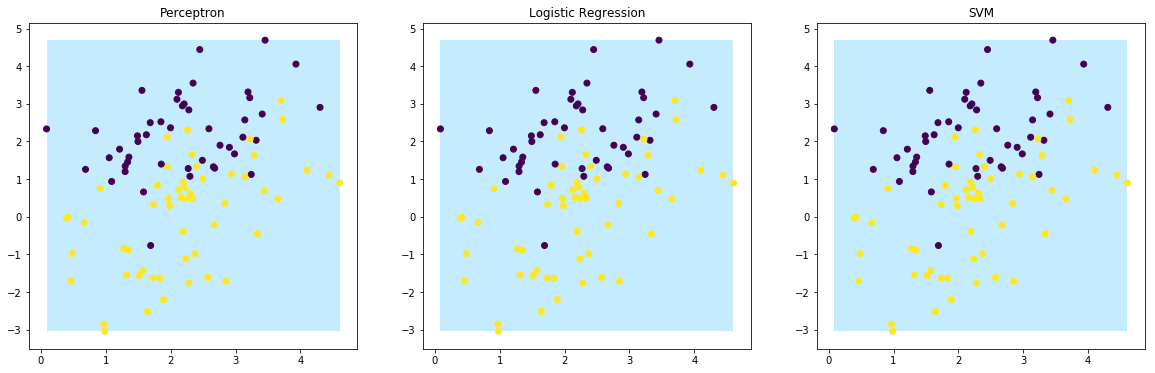

In [400]:
Xtrain,ytrain, Xtest, ytest = pickle.load(open('sample.pickle','rb')) 
# add intercept
Xtrain_i = np.concatenate((np.ones((Xtrain.shape[0],1)), Xtrain), axis=1)
Xtest_i = np.concatenate((np.ones((Xtest.shape[0],1)), Xtest), axis=1)

# Replace next three lines with code for learning w using the three methods
w_perceptron = np.zeros((Xtrain_i.shape[1],1))
w_logistic = np.zeros((Xtrain_i.shape[1],1))
w_svm = np.zeros((Xtrain_i.shape[1],1))
fig = plt.figure(figsize=(20,6))

ax = plt.subplot(1,3,1)
plotBoundaries(w_perceptron,Xtrain_i,ytrain)
ax.set_title('Perceptron')

ax = plt.subplot(1,3,2)
plotBoundaries(w_logistic,Xtrain_i,ytrain)
ax.set_title('Logistic Regression')

ax = plt.subplot(1,3,3)
plotBoundaries(w_svm,Xtrain_i,ytrain)
ax.set_title('SVM')
